In [1]:
import os
import pandas as pd
#import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

import time
from testWN import testWN as twm
import wntr
import wntr.network.controls as controls
import pdb
import pickle

In [2]:
%matplotlib notebook

# Water Network data loading

/Applications/anaconda3/lib/python3.7/site-packages/wntr/epanet/io.py:2085: UserWarning: Not all curves were used in "../Code/c-town_true_network_simplified.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


<IPython.core.display.Javascript object>


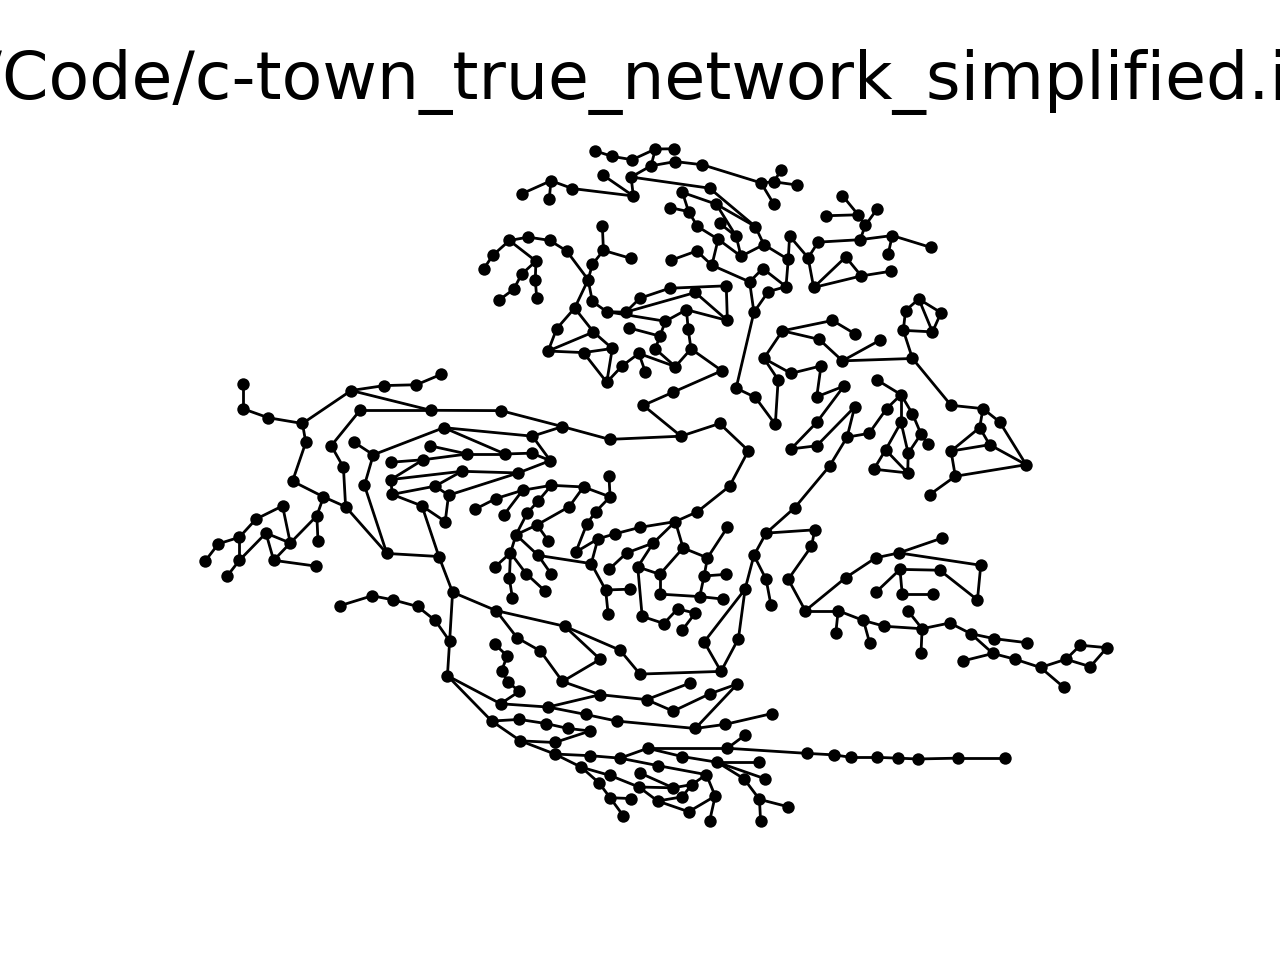

/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [3]:
inp_file = '../Code/c-town_true_network_simplified.inp'

ctown = twm(inp_file)

# plt.figure()

# %%
# Graphical representation of the network
plt.rcParams.update({'font.size': 20})
wntr.graphics.plot_network(ctown.wn, title=ctown.wn.name, node_labels=False, link_labels=False, directed=False)
fig = mpl.pyplot.gcf()
mpl.rcParams.update(mpl.rcParamsDefault)

plt.show()

# Modify demand patterns

<IPython.core.display.Javascript object>


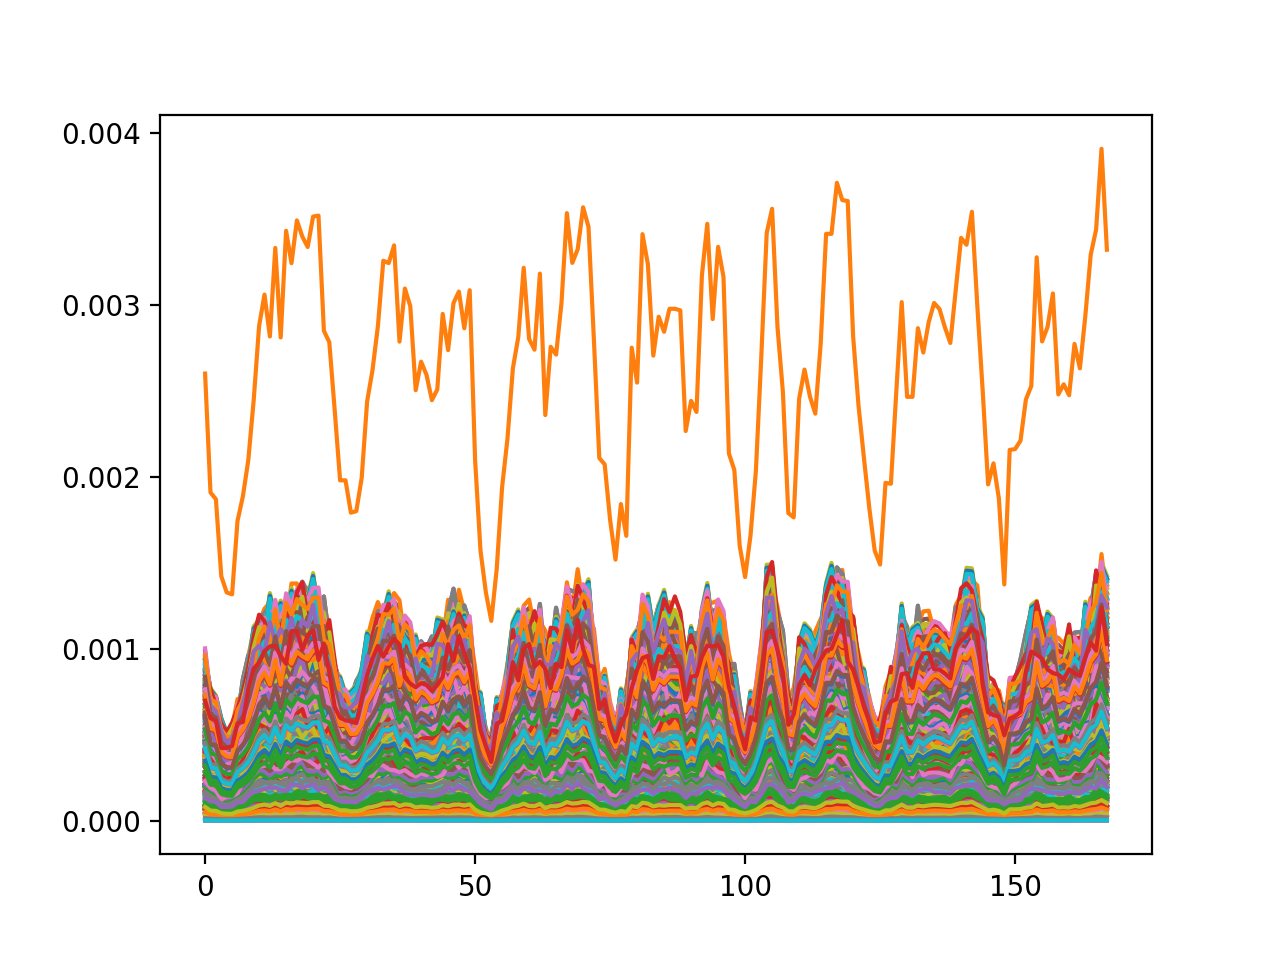

In [4]:
# Get and display demand patterns
df_pat = pd.DataFrame(columns = ctown.wn.junction_name_list)
for name, j in ctown.wn.junctions():
   base = j.demand_timeseries_list[0].base_value
   pat = j.demand_timeseries_list[0].pattern
   if pat is not None:
       df_pat.loc[:,name] = base * j.demand_timeseries_list[0].pattern.multipliers

#get nodes with base-demand > 0
d_juncs = df_pat.dropna(axis=1).columns

#display demand patterns
df_pat.plot(legend=None)
plt.show()

In [5]:
# Varying demand patterns
# Scaling
ctown.randomlyScaleMultipliers(0.1)  # Input is the maximum possible percentage of change for each pattern value

# Shifting
ctown.randomlyShiftMultipliers(3)  # Input is the maximum time shift allowed (in hours)

<IPython.core.display.Javascript object>


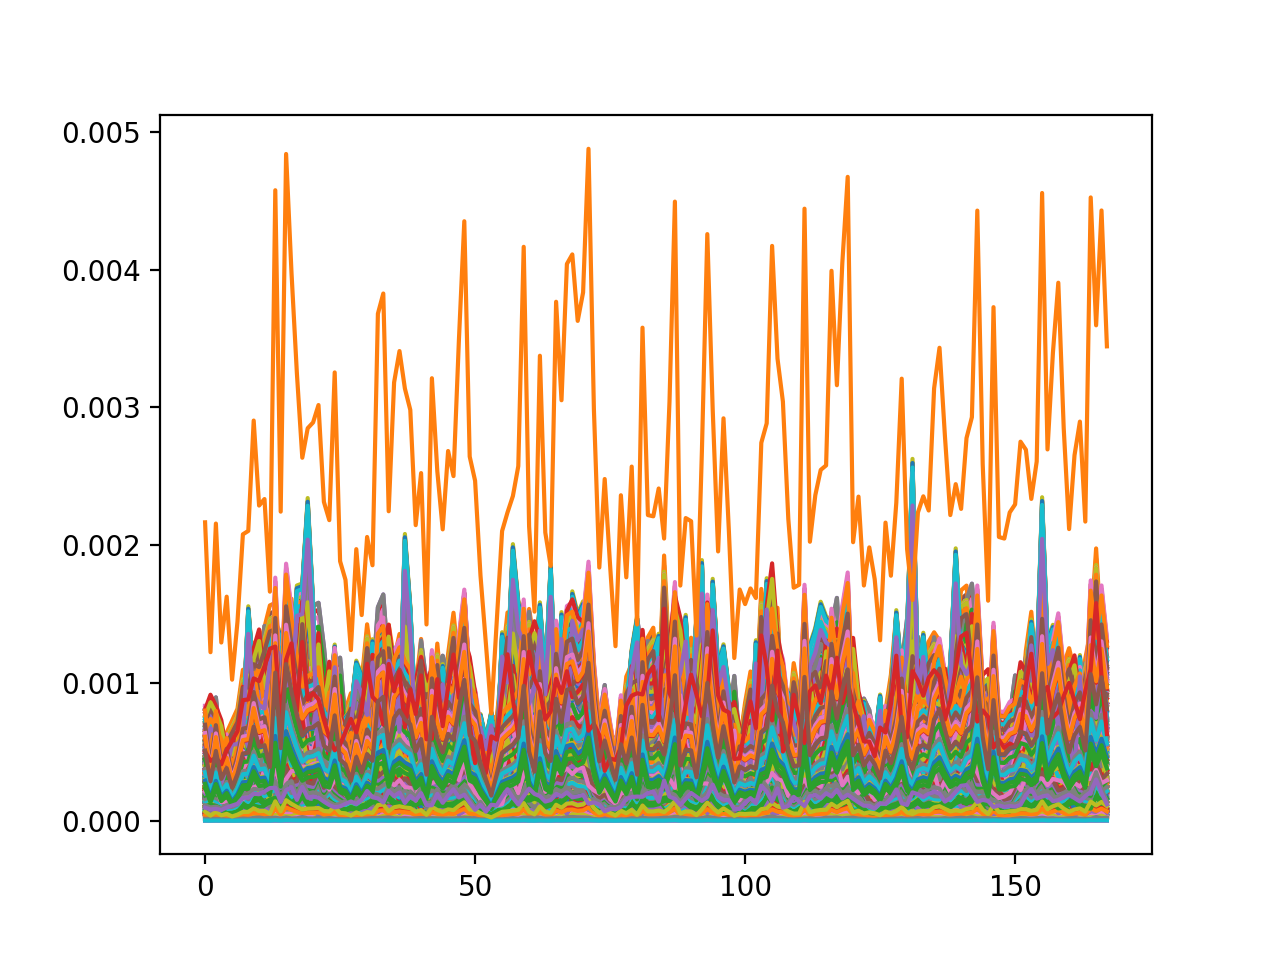

In [6]:
# Representing modified demand patterns
df_pat = pd.DataFrame(columns = ctown.wn.junction_name_list)
for name, j in ctown.wn.junctions():
   base = j.demand_timeseries_list[0].base_value
   pat = j.demand_timeseries_list[0].pattern
   if pat is not None:
       df_pat.loc[:,name] = base * j.demand_timeseries_list[0].pattern.multipliers

# get nodes with base-demand > 0
d_juncs = df_pat.dropna(axis=1).columns

# display demand patterns
df_pat.plot(legend=None)
plt.show()

# Run simulation

In [7]:
nDaysSim = 7
nHoursSim = 24*nDaysSim

# wn.options.time.duration = 3600*24*nDaysSim#*nYearsSim
ctown.wn.options.time.hydraulic_timestep = 60*15  # 15 min
ctown.wn.options.time.quality_timestep = 60*15  # 5 min
ctown.wn.options.quality.mode = 'AGE'
ctown.wn.options.results.energystr = True

start_time = time.time()

# TODO: Add controls
#ctown.addControls('V45', 'setting', 10., 'T4', '<', 3, 'user_added_1')
#ctown.addControls('V45', 'setting', 40., 'T4', '>', 4, 'user_added_2')

for i in range(nHoursSim):
    if (i==0):
        print('Simulation running')
    # Run the simulation for the next time step
    ctown.wn.options.time.duration = 3600*i
    sim = wntr.sim.EpanetSimulator(ctown.wn)
    results = sim.run_sim()

print('Total simulation time: %.3f s' % (time.time()-start_time))
with open("results_sim.pkl", "wb") as f:
    pickle.dump(results, f)

plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10, 8))

Simulation running
Total simulation time: 23.065 s
